In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
#Declare a Base using 'automap_base()"
Base = automap_base()
# reflect an existing database into a new model
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
#Display the row's columns and data in dictionary format for measurement
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2618f339788>,
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'station': 'USC00519397'}

In [10]:
#Display the row's columns and data in dictionary format for station
first_row_station = session.query(station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2618f3a7c48>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'longitude': -157.8168,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Precipitation Analysis

In [11]:
## Total Dates
session.query(func.count(measurement.date)).all()

[(19550)]

In [12]:
## Earliest Date
#session.query(measurement.date).order_by(measurement.date).first()

In [13]:
## latest Date
#session.query(measurement.date).order_by(measurement.date.desc()).first()

In [14]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [15]:
x = session.query(measurement.date).order_by(measurement.date.desc()).first()

In [16]:
print(str(x[0]))
import datetime as dt


2017-08-23


In [17]:
# Calculate the date one year from the last date in data set.
# To account for potential leap year, I did it by year.
# determine end date

end_date = dt.datetime.strptime(x[0],'%Y-%m-%d').date()
print(end_date)

2017-08-23


In [18]:
#determine beginning date
beginning_date = dt.date(end_date.year - 1, end_date.month, end_date.day)
print(beginning_date)

2016-08-23


In [19]:
# Design a query to retrieve the last year (12 mos) of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Perform a query to retrieve the data and precipitation scores
precip_query = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= beginning_date).all()

print(precip_query)


[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
#data frame has dates sorted in order.

precip_df = pd.DataFrame(precip_query)
precip_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


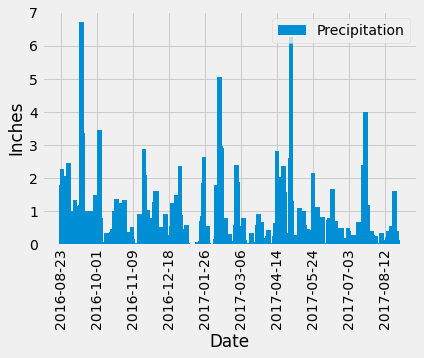

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(precip_df['date'], precip_df['prcp'], width = 5)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(("Precipitation",), loc='upper right')
plt.xticks(np.arange(0, 365, 39), rotation = 'vertical')
plt.show()

In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station.station).count()
print (station_count)

9


In [47]:
# {'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2a9d2a46a48>,
# 'prcp': 0.08,
# 'id': 1,
# 'tobs': 65.0,
# 'date': '2010-01-01',
#'station': 'USC00519397'}
#Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_station = session.query(measurement.station, func.count(measurement.prcp)).group_by(measurement.station).order_by(func.count(measurement.prcp).desc()).all()
active_station



[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [84]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Station_USC00519281 = session.query(measurement.date, measurement.station, measurement.tobs).\
    filter(measurement.station == "USC00519281").all()

#print(Station_USC00519281) 

station_df = pd.DataFrame(Station_USC00519281)
station_df.head()

temp_results = station_df.groupby('station').agg({'tobs': ['mean', 'min', 'max']})
print(temp_results)

                  tobs            
                  mean   min   max
station                           
USC00519281  71.663781  54.0  85.0


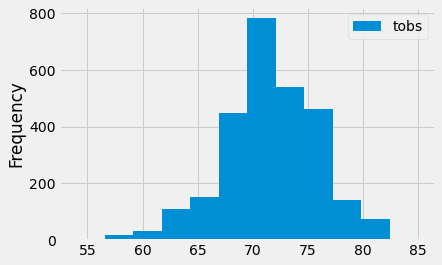

In [137]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temps_query = session.query(measurement.tobs, measurement.date).\
filter(measurement.station =="USC00519281" and measurement.date >= beginning_date).all()

#print(station_temps_query)
temp_df= pd.DataFrame(station_temps_query)
temp_df.head(20)

ax =temp_df.plot.hist(bins=12)


# Close session

In [138]:
# Close Session
session.close()